# Сравнение средних

---
**ВАЖНАЯ ЗАМЕТКА:**

Если число наблюдений меньше 30, 
z-преобразование заменяется на t-преобразование.
Чем выше число наблюдений, тем ближе форма t-распределения к нормальному

---

## сравнение двух средних, t-критерий Стьюдента (Student's t-test)

Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от воздействующей на них температуры.

При сравнении двух видов были получены следующие значения температуры плавления образца:

In [ ]:
mu_1, std_1, n_1 = 89.9, 11.3, 20
mu_2, std_2, n_2 = 80.7, 11.7, 20

Предположим 2 гипотезы:

H0 - М1=М2, оба вида принадлежат одной генеральной совокупности

H1 - М1!=М2, оба вида принадлежат разным генеральным совокупностям

Проверяем H0: разница M0-M1 должна распределиться нормально с средним в нуле

Определим на сколько сигма отклоняется разница наших выборочных средних от разницы средних генеральных совокупностей (0):

In [ ]:
from math import sqrt

se = sqrt((std_1**2) / n_1 + (std_2**2) / n_2)
print(f'se = {se:.01f}')

t = (mu_1 - mu_2) / se
print(f't = {t:.01f}')
print(f'Degrees of freedom={n_1 + n_2 - 2}')

se = 3.6
t = 2.5
Degrees of freedom=38


Воспользовавшись сервисом https://gallery.shinyapps.io/dist_calc/ выбрав t-распределение и установив Degrees of freedom=38, both tails: a = -2.5, b = 2.5

получим p-value: P(X < -2.5 or X > 2.5) = 0.0169, что меньше 0,05

Ttest_indResult(statistic=6.04781958789892, pvalue=4.894702897415829e-07)
H0 can be rejected, means aren't statistically equal, factor impacts


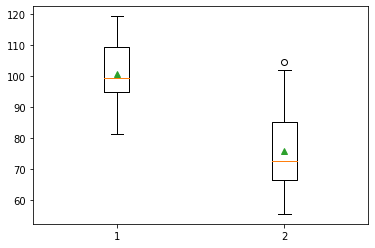

In [ ]:
# вариант с помощью scipy
from scipy import stats
import matplotlib.pyplot as plt

sample_1 = [84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5]
sample_2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5]

res = stats.ttest_ind(sample_1, sample_2)
print(res)
if res[1] >= 0.05:
    print("H0 can't be rejected, means are statistically equal, no factor impact")
else:
    print("H0 can be rejected, means aren't statistically equal, factor impacts")

plt.boxplot([sample_1, sample_2], showmeans=True, whis=True)
plt.show()

## Confidence interval and Student's t-test (2.2 step 12)

Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу mu +- 1.96 * std / sqrt(n)

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:

mu=89,9 sd=11,3 n=20 

Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96. 

Давайте воспользуемся таблицей критических значений для t - распределения для нахождения нужного t - значения ﻿:

http://www.medcalc.org/manual/t-distribution.php

В этой таблице нас интересует столбец, где A=0,95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

В соответствии с таблицей это число 2.093

In [ ]:
from math import sqrt

mu, std, n = 89.9, 11.3, 20
t = 2.093

se = std /  sqrt(n)
print(f'se={se:.2f}')
print(f'95%-ный доверительный интервал=[{mu - t * se:.2f}; {mu + t * se:.2f}]')

se=2.53
95%-ный доверительный интервал=[84.61; 95.19]


## QQ-Plot

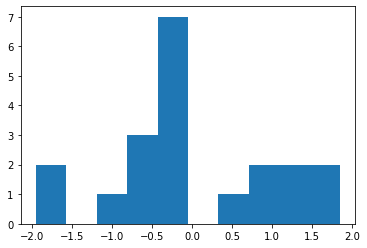

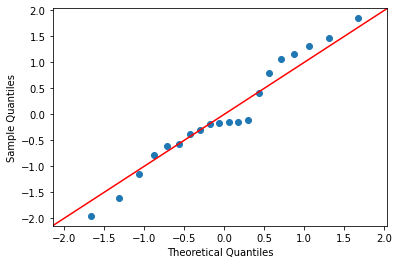

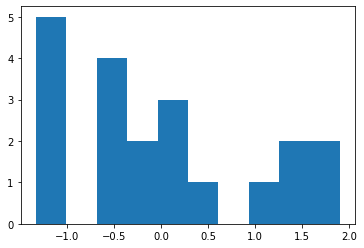

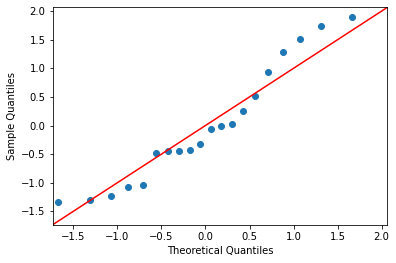

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

sample_1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
sample_2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

for data in (sample_1, sample_2):
    data = (data - np.mean(data)) / np.std(data) # don't forget about standartization!!!
    plt.hist(data)
    fig = sm.qqplot(data, line='45')
    plt.show()

## Однофакторный дисперсионный анализ (One-way analysis of variance)

Возьмем 3 наблюдения
Определим 2 гипотезы:

H0: M1=M2=M3

H1: M1!=M2 or M2!=M3 or M1!=M3

In [ ]:
import numpy as np

sample_1 = np.array([3, 1, 2])
sample_2 = np.array([5, 3, 4])
sample_3 = np.array([7, 6, 5])

In [ ]:
# Рассчитаем среднее по всем выборкам
all_samples = np.append(sample_1, np.append(sample_2, sample_3))
n = len(all_samples)
m = 3 #num of groups
mean_all = np.mean(all_samples)
print(f"mean_all={mean_all}")

# SST - Total Sum of Squares (общая сумма квадратов): базовое понятие дисперсионного анализа
# Показывает, насколько высока изменчивость наших данных без учета разделения их на группы
SST = sum((all_samples-mean_all)**2)
print(f"SST={SST}")

# Число степеней свободы
df = n - 1
print(f"df={df}")

mean_all=4.0
SST=30.0
df=8


In [ ]:
"""
 На SST влияют два параметра:
 1. SSB (sum of squares between groups)
 2. SSW (sum of squares within group)
"""
def SSW_in_group(sample):
    return sum((sample - np.mean(sample))**2)

SSW = SSW_in_group(sample_1) + SSW_in_group(sample_2) + SSW_in_group(sample_3)
print(f"SSW={SSW}")
df = n - m
print(f"df={df}")

n_1, n_2, n_3 = len(sample_1), len(sample_2), len(sample_3)
SSB = n_1*(np.mean(sample_1) - mean_all)**2 + n_2*(np.mean(sample_2) - mean_all)**2 + n_3*(np.mean(sample_3) - mean_all)**2
print(f"SSB={SSB}")
df = m - 1
print(f"df={df}")

SSW=6.0
df=6
SSB=24.0
df=2


Получаем

SST = 30

SSB = 24

SSW = 6

Вывод: если большая часть нашей общей изменчивости обеспечивается именно благодаря сумме квадратов междугрпповых, это означает, что наши группы значительно различаются между собой

Рассчитает основной статистический показатель дисперсионного анализа, F-значение

In [ ]:
from scipy import stats

f_value = (SSB / (m-1)) / (SSW / (n-m))
print(f"f_value={f_value}")
print(f"f_value={stats.f_oneway(sample_1, sample_2, sample_3)}")

f_value=12.0
f_value=F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)


Воспользовавшись сайтом https://gallery.shinyapps.io/dist_calc/ выясняем(выбераем F distribution, Degrees of freedom=2, Degrees of freedom (2)=6, a=12), что вероятность получить такие или более выраженные различия равны (p-уровень значимости) P(X > 12) = 0.008

### Пример

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


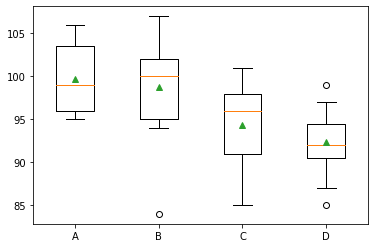

In [23]:
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data/genetherapy.csv")

data_a = data.loc[lambda df: df["Therapy"] == "A"]["expr"]
data_b = data.loc[lambda df: df["Therapy"] == "B"]["expr"]
data_c = data.loc[lambda df: df["Therapy"] == "C"]["expr"]
data_d = data.loc[lambda df: df["Therapy"] == "D"]["expr"]

f_value = stats.f_oneway(data_a, data_b, data_c, data_d)
print(f_value)

plt.boxplot([data_a, data_b, data_c, data_d], showmeans=True, whis=True, 
    labels=["A", "B", "C", "D"])
plt.show()

Для дисперсионного анализа важно, чтобы выполнялись 2 условия:
1. Нормальность распределения зависимой переменной в каждой из групп
2. Гомогенность дисперсии (дисперсия примерно одинакова в каждой из групп)

При количестве наблюдений больше 50 ANOVA достаточно устойчива к нарушению обоих
из этих двух ограничений

Гомогенность можно проверить по графику box-plot (проверить наличие существенных выбросов)


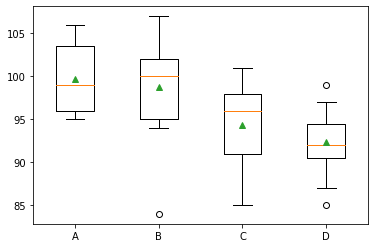

Для проверки нормальности распределения можно построить графики QQ-plot


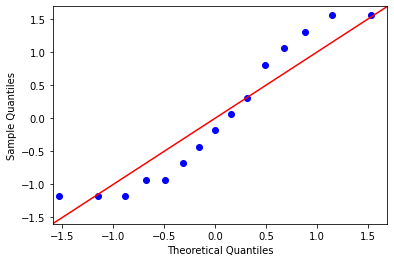

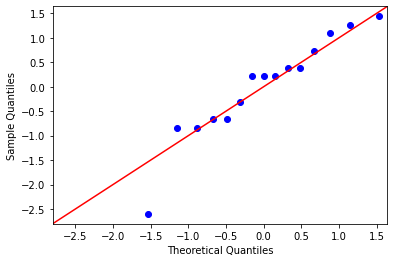

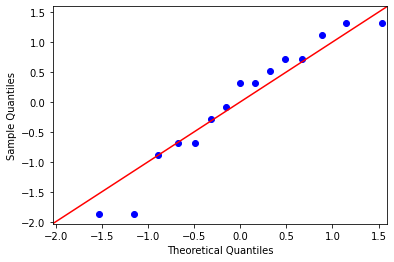

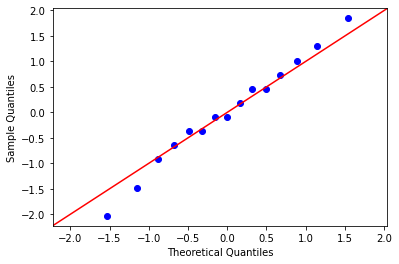

In [37]:
print("Гомогенность можно проверить по графику box-plot (проверить наличие существенных выбросов)")
plt.boxplot([data_a, data_b, data_c, data_d], showmeans=True, whis=True, 
    labels=["A", "B", "C", "D"])
plt.show()
print("Для проверки нормальности распределения можно построить графики QQ-plot")
for data in (data_a, data_b, data_c, data_d):
    data = (data - np.mean(data)) / np.std(data)
    sm.qqplot(data, line='45')
plt.show()

## Критерий Тьюки (Tukey HSD)

Для данных из последнего примера
Критерий Тьюки сравнивает попарно все комбинации наших средних. 
Расссчитывается доверительный интервал разницы между средними значениями, 
и если такой доверительный интервал не включает в себя ноль, 
то можно откдонить нулевую гипотезу о равенстве средних 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
df = pd.DataFrame({'score': data['expr'],
                    'group': np.repeat(['data_a', 'data_b', 'data_c', 'data_d'], repeats=data.shape[0]/4)})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
data_a data_b  -0.9333 0.9514  -5.5959  3.7292  False
data_a data_c  -5.3333 0.0189  -9.9959 -0.6708   True
data_a data_d     -7.4 0.0005 -12.0626 -2.7374   True
data_b data_c     -4.4  0.071  -9.0626  0.2626  False
data_b data_d  -6.4667 0.0029 -11.1292 -1.8041   True
data_c data_d  -2.0667 0.6458  -6.7292  2.5959  False
-----------------------------------------------------


## Двухфакторный дисперсионный анализ (two-way analysis of variance)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data/atherosclerosis.csv')

# Performing two-way ANOVA
model = ols('expr ~ C(age) + C(dose) + C(age):C(dose)', data=data).fit()
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)

                  df       sum_sq     mean_sq         F    PR(>F)
C(age)           1.0   197.452754  197.452754  7.449841  0.008313
C(dose)          1.0    16.912241   16.912241  0.638094  0.427552
C(age):C(dose)   1.0     0.927077    0.927077  0.034978  0.852272
Residual        60.0  1590.257424   26.504290       NaN       NaN


In [ ]:
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data['age'] = data['age'].astype(str)
data['age/dose'] = data['age'] + '/' + data['dose']

tukey = pairwise_tukeyhsd(endog=data['expr'],
                            groups=data['age/dose'],
                            alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1/D1   1/D2   0.7874    0.9 -4.0226 5.5974  False
  1/D1   2/D1  -3.7537 0.1773 -8.5636 1.0563  False
  1/D1   2/D2  -2.4848 0.5231 -7.2948 2.3251  False
  1/D2   2/D1  -4.5411 0.0711  -9.351 0.2689  False
  1/D2   2/D2  -3.2722 0.2847 -8.0822 1.5377  False
  2/D1   2/D2   1.2688 0.8934 -3.5412 6.0788  False
---------------------------------------------------


## Взаимодействие факторов в ANOVA (Interaction of factors in ANOVA)

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data/birds.csv')

model = ols('var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)', data=data).fit()
result = sm.stats.anova_lm(model, type=2)

print(result)
print("""
Каждый фактор по отдельности не вносит силного влияния, 
но при этом видно сильное взаимодействие между факторами.
Это означает, что влияние одного фактора по-разному проявляется
на зависимую переменную в зависимости от градаций другого фактора (и это 
является достаточной причиной отклонения нулевой гипотезы
в многофакторном дисперсионном анализе о равенстве средних во всех группах)""")

                     df      sum_sq    mean_sq         F    PR(>F)
C(hormone)          1.0    0.847472   0.847472  0.086528  0.769653
C(sex)              1.0    0.119762   0.119762  0.012228  0.912318
C(hormone):C(sex)   1.0   89.483384  89.483384  9.136390  0.003682
Residual           60.0  587.650394   9.794173       NaN       NaN

Каждый фактор по отдельности не вносит силного влияния, 
но при этом видно сильное взаимодействие между факторами.
Это означает, что влияние одного фактора по-разному проявляется
на зависимую переменную в зависимости от градаций другого фактора (и это 
является достаточной причиной отклонения нулевой гипотезы
в многофакторном дисперсионном анализе о равенстве средних во всех группах)
